[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 2), (2, 1)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 2), (2, 1)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 2), (2, 1)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1, 真实结果是: 1
[(1, 3)]
返回的结果是: 1,

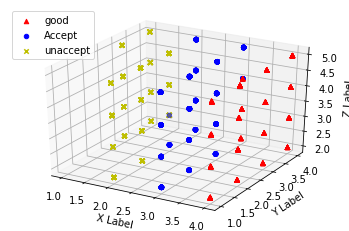

In [21]:
from numpy import *
import operator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

def KeyToNum(line):
    #将一行的字符串变成对应的数字
    numline = []
    switcher = {
    'vhigh' : 4 ,
    'high' : 3 ,
    'med': 2 ,
    'low' : 1 ,
    '5more' : 5 ,
    'more' : 6 ,
    'small' : 1 ,
    'big' : 3 ,
    'unacc' : 1 ,
    'acc' : 2 ,
    'good' : 3 ,
    'vgood' : 4 ,
    }
    for key in line:
        numline.append(switcher.get(key, key))
    return numline


#载入数据
def file2matrix(fileName):
    file = open(fileName)
    allLines = file.readlines()
    row = len(allLines)
    dataSet = zeros((row, 6))
    labels = []
    index = 0
    for line in allLines:
        line = line.strip()
        listFromLine = line.split(',')
        listFromLine = KeyToNum(listFromLine)
        dataSet[index, :] = listFromLine[0:6]
        labels.append(listFromLine[-1]) #取最后一维为标签
        index += 1
    return dataSet, labels #数据集和标签分开
    
def kNN(x, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    distance1 = tile(x, (dataSetSize,1)) - dataSet #欧氏距离计算开始
    distance2 = distance1 ** 2 #每个元素平方
    distance3 = distance2.sum(axis=1) #矩阵每行相加
    distance4 = distance3 ** 0.5 #欧氏距离计算结束
    sortedIndex = distance4.argsort() #返回从小到大排序的索引
    classCount = {}
    for i in range (k): #统计前k个数据类的数量
        label = labels[sortedIndex[i]]
        classCount[label] = classCount.get(label,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)#从大到小按类别数目排序
    print(sortedClassCount)
    return sortedClassCount[0][0]
    
def kNN_test():
    testRatio = 0.1 #取数据集的前0.1为测试数据
    dataSet, labels = file2matrix('car.txt')
    row = dataSet.shape[0]    #数据集的行数，即数据集的总的样本数
    testNum = int(row * testRatio)
    error = 0.0 #判断错误的个数
    for i in range (testNum):
        result = kNN(dataSet[i, :], dataSet[testNum:row, :], labels[testNum:row], 3)
        print('返回的结果是: %s, 真实结果是: %s' % (result, labels[i]))
        if result != labels[i]:
            error += 1.0
    print('错误率为: %f' % (error/float(testNum)))
  
#画出散点图
def scatter():
    dataSet, labels = file2matrix('car.txt')
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    type1 = ax.scatter(dataSet[0:500, 0], dataSet[0:500, 1], dataSet[0:500, 2], c='r', marker='^')
    type2 = ax.scatter(dataSet[500:1000, 0], dataSet[500:1000, 1], dataSet[500:1000, 2], c='b', marker='o')
    type3 = ax.scatter(dataSet[1000:1500, 0], dataSet[1000:1500, 1], dataSet[1000:1500, 2], c='y', marker='x')
    ax.legend((type1, type2, type3), ('good', 'Accept', 'unaccept'))
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

kNN_test()
scatter()
